# Customer Segmentation
Use Case Summary

* Objective Statement:

Get business insight about how many product sold every month.
Get business insight about how much customer spend their money every month.
To reduce risk in deciding where, when, how, and to whom a product, service, or brand will be marketed.
To increase marketing efficiency by directing effort specifically toward the designated segment in a manner consistent with that segment’s characteristics.

* Challenges:

Large size of data, can not maintain by excel spreadsheet.
Need several coordination from each department.
Demography data have a lot missing values and typo.

* Methodology / Analytic Technique:

Descriptive analysis
Graph analysis
Segment Analysis

* Business Benefit:

Helping Business Development Team to create product differentiation based on the characteristic for each customer.
Know how to treat customer with specific criteria.

* Expected Outcome:

Know how many product sold every month.
Know how much customer spend their money every month.
Customer segmentation analysis.
Recommendation based on customer segmentation.
Business Understanding
Retail is the process of selling consumer goods or services to customers through multiple channels of distribution to earn a profit.

* This case has some business question using the data:

How many product sold every month?
How much customer spend their money every month?
How about Customer segmentation analysis?
How about recommendation based on customer segmentation?
Data Understanding
Data of Retail Transaction from 01 December 2010 to 09 December 2011

* Source Data: Online retail dataset by UCI Machine Learning Library.
https://archive.ics.uci.edu/ml/datasets/Online+Retail

* Data Dictionary:

InvoiceNo: Invoice number uniquely assigned to each transaction.
StockCode: Product (item) code.
Description: Product (item) name.
Quantity: The quantities of each product (item) per transaction.
InvoiceDate: The day and time when each transaction was generated.
UnitPrice: Product price per unit in sterling.
CustomerID: Customer number uniquely assigned to each customer.
Country: The name of the country where each customer resides.

In [2]:
# Importing the modules that will be required for this project
import numpy as np
import pandas as pd
import math
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Importing Dataset
df=pd.read_excel(r"C:\Users\abhin\OneDrive\Desktop\RESUME PROJECTS\Online Retail.xlsx")

# Exploring the data in the given dataset

In [4]:
#Data in the top 5 rows 
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
# Printing the shape of the dataset
df.shape

(541909, 8)

In [6]:
#checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
#Getting the statistical Summary of our dataset
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


* We can see the min value in the Quantity and UnitPrice is negative.Therefore, we must look for these negative values.

In [8]:
#checking the data with negetive qty
df.loc[df.Quantity < 0].sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
191494,C553370,M,Manual,-1,2011-05-16 14:30:00,260.70,NaN,United Kingdom
24193,C538341,21647,ASSORTED TUTTI FRUTTI LARGE PURSE,-1,2010-12-10 14:03:00,2.10,15514.0,United Kingdom
414734,C572481,22591,CARDHOLDER GINGHAM CHRISTMAS TREE,-2,2011-10-24 13:48:00,3.25,15632.0,United Kingdom
114534,546020,85175,Amazon sold sets,-210,2011-03-08 17:27:00,0.00,NaN,United Kingdom
196123,C553780,21871,SAVE THE PLANET MUG,-2,2011-05-19 10:53:00,1.25,15730.0,United Kingdom
431819,C573760,22556,PLASTERS IN TIN CIRCUS PARADE,-2,2011-11-01 09:52:00,1.65,16648.0,United Kingdom
382788,C569949,22960,JAM MAKING SET WITH JARS,-1,2011-10-06 18:27:00,4.25,12584.0,Italy
96710,C544583,S,SAMPLES,-1,2011-02-21 14:48:00,37.49,NaN,United Kingdom
304660,C563591,23296,SET OF 6 TEA TIME BAKING CASES,-4,2011-08-18 06:10:00,1.25,16145.0,United Kingdom
465521,C576242,84949,SILVER HANGING T-LIGHT HOLDER,-2,2011-11-14 13:37:00,1.65,16747.0,United Kingdom


In [9]:
#Let's have a look at the most expensive item in the store.
df[df.UnitPrice == df.UnitPrice.max()]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.0,15098.0,United Kingdom


* From the above review on dataset we have some observations:

Most Invoices appear as normal transcations with positive quantity and prices, but there are some values in the quantity column that are addressed as negative quatity posses invoice number starting with 'C',therefore all these belong to cancelled orders.

Empty or Null values are in CustomerID are around 135080 that need to be treated.

Here we have a data for 38 different countries.

There are total 10624 record where the quantity is negative. Average Unit price of all the items in the store is coming out to be 4.6 sterling.

Most expensive item in the store is Manual,whose cost is 38970 sterling and that too is a cancelled order.

We should further break-down the InvoiceDate column to draw some more insights.

# Data Pre-processing

In [10]:
# Checking for Null values
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

* Maximum number of missing values are coming from customer_id and we will drop such values.

In [11]:
#Dropping the null values in the dataset
df.dropna(subset=['CustomerID'],inplace=True)

In [12]:
# Checking for Null values
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [13]:
df.nunique()

InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
dtype: int64

# Checking for the Duplicate values:

In [14]:
# Checking for an duplicated values
df.duplicated().sum()

5225

* If two records are same,the StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country but invoice number cannot be same therefore we must drop the duplicate records.

In [15]:
#Drop the duplicated values
df.drop_duplicates(inplace=True)


In [16]:
# Checking for an duplicated values
df.duplicated().sum()

0

In [17]:
df.shape

(401604, 8)

In [18]:
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [19]:
df_new=df[~df['InvoiceNo'].str.contains('C')]

* we have to drop some InvoiceNo which are starts with 'c' because 'c', it indicates a cancellation

In [20]:
df_new.shape


(392732, 8)

In [21]:
#Getting the statistical Summary of our dataset
df_new.describe()


,Quantity,UnitPrice,CustomerID
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822
std,181.588420,22.240725,1713.567773
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


# EDA and Visualzation

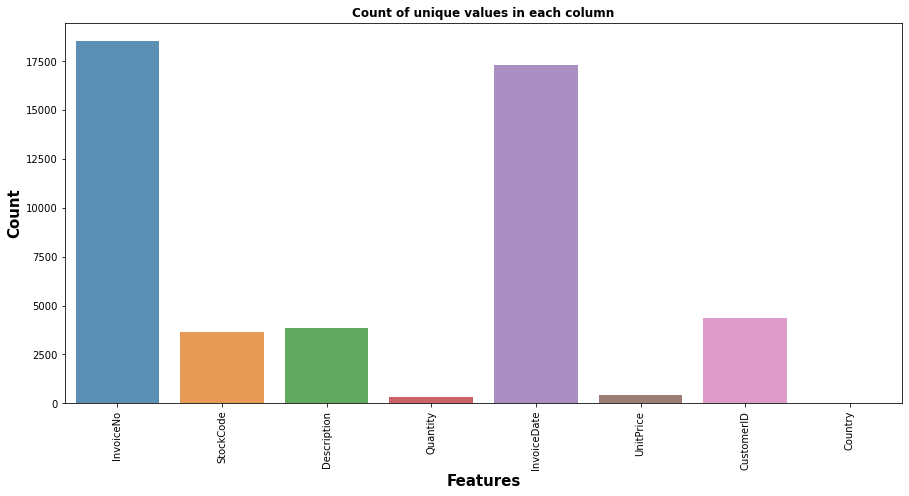

In [22]:
#Let's understand the unique values through visualization

#Let's create a dataframe for the number of unique values 
df_nunique=pd.DataFrame()
df_nunique['Features']=df_new.columns
unique=[]
for i in df_new.columns:
  unique.append(df_new[i].nunique())
df_nunique['Uniques']=unique

# Plot the bar plot for the above results
f, ax = plt.subplots(1,1, figsize=(15,7))
splot = sns.barplot(x=df_nunique['Features'], y=df_nunique['Uniques'], alpha=0.8)
plt.title('Count of unique values in each column',weight='bold')
plt.ylabel('Count', size=15, weight='bold')
plt.xlabel('Features', size=15, weight='bold')
plt.xticks(rotation=90)
plt.show()

* Although our dataset has initially 541909 records but the number of unique invoices generated are very less.

In [23]:
#dataframe with unique invoices
df_country = df_new.groupby('Country')[['InvoiceNo']].nunique().sort_values(by='InvoiceNo', ascending=False).head(10).reset_index()
df_country

,Country,InvoiceNo
0,United Kingdom,16649
1,Germany,457
2,France,389
3,EIRE,260
4,Belgium,98
5,Netherlands,95
6,Spain,90
7,Australia,57
8,Portugal,57
9,Switzerland,51


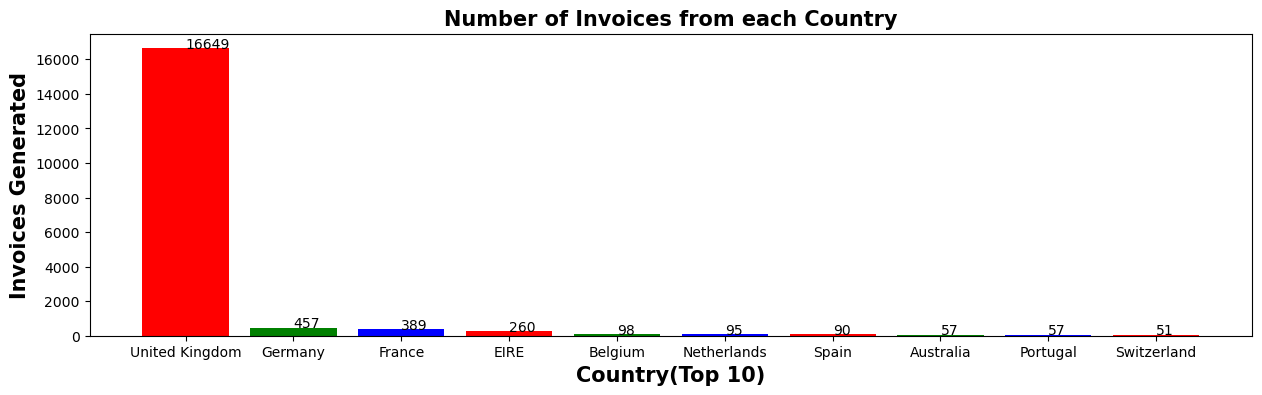

In [24]:
#Let's see through the visualization
fig, ax = plt.subplots(figsize=(15,4),dpi=100)
plt.style.use('seaborn-colorblind')

# Define x and y 
x=df_country['Country']
y=df_country['InvoiceNo']

# Plot the bar plot
plt.bar(x,y,color="rgb")

# Function to set label
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

addlabels(x,round(y,2))

# set xlabel. ylabel and title
plt.xlabel("Country(Top 10)", weight="bold",size=15)
plt.ylabel("Invoices Generated",weight="bold",size=15)
plt.title("Number of Invoices from each Country",weight="bold",size=15)

## Showing the plot
plt.show()

In [25]:
## Generating the dataframe of country w.r.t the Sucessfull orders generated
df_sales = df[~df['InvoiceNo'].str.startswith('C',na=False)].groupby('Country')[['InvoiceNo']].nunique().sort_values(by='InvoiceNo', ascending=False).head(10).reset_index()
df_sales

,Country,InvoiceNo
0,United Kingdom,16649
1,Germany,457
2,France,389
3,EIRE,260
4,Belgium,98
5,Netherlands,95
6,Spain,90
7,Australia,57
8,Portugal,57
9,Switzerland,51


* Cancelled Items From the description,If this code starts with letter 'C', it indicates a cancellation.

In [26]:
# Transactions with Cancelled Items.
df_cancelled = df[df.InvoiceNo.str.contains('C',na=False)]
df_cancelled.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [27]:
#Creating the dataframe for cancelled orders
df_cancelled_orders=df_cancelled[['InvoiceNo','Country']].groupby('Country').count().sort_values(by='InvoiceNo', ascending=False).head(10).reset_index()

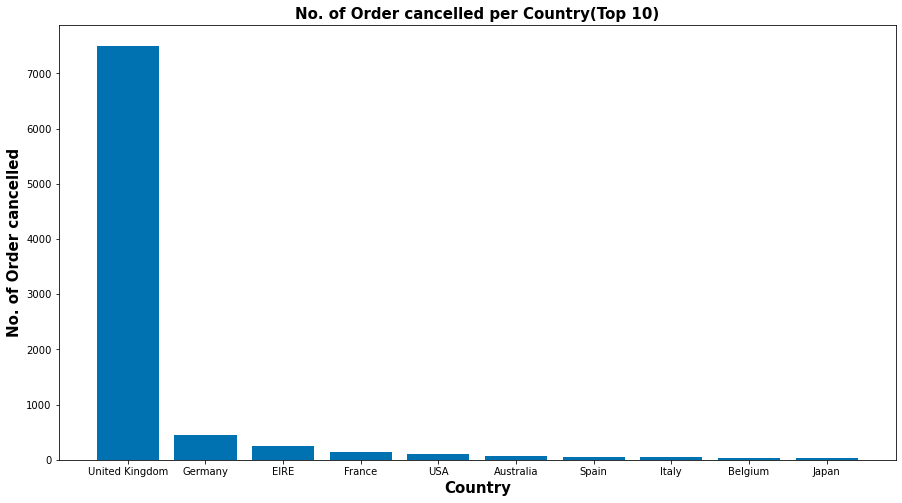

In [28]:
# Figure Size
plt.figure(figsize=(15,8))

## Define x and y axis
x=df_cancelled_orders['Country']
y=df_cancelled_orders['InvoiceNo']

# creating the bar plot
plt.bar(x,y)

# set xlabel. ylabel and title
plt.xlabel("Country", size=15, weight='bold')
plt.ylabel("No. of Order cancelled", size=15, weight='bold')
plt.title("No. of Order cancelled per Country(Top 10)",size=15, weight='bold')

## Showing the plot
plt.show()

* United Kingdom has got the maximum number cancelled orders followed by Germany with considerable margin.

* Australia,Spain,Italy,Belgium,Japan has least and almost negligible amount of cancelled orders.

In [29]:
#Taking only invoices which were not cancelled
df_new = df_new[~df_new["InvoiceNo"].str.contains("C", na=False)]

#Taking only postive values from variables
df_new = df_new[df_new['Quantity']>0]
df_new = df_new[df_new['UnitPrice']>0]
df_new.shape

(392692, 8)

In [30]:
# Changing The datatype of Date attribute to extract 'Month','Day',"Year". so that we can analyze the Bike rentals with respect to year, months and days.
df_new['InvoiceDate']=df_new['InvoiceDate'].astype('datetime64[ns]')


In [31]:
# Filtering the dataset 
uk_data = df_new.loc[df_new['Country'] == 'United Kingdom']

# Feature Engineering and EDA On New Features

In [32]:
# Adding new features month , day and hour from invoice date
uk_data['Invoice_day'] = uk_data['InvoiceDate'].dt.day_name()
uk_data['Invoice_hour'] = uk_data['InvoiceDate'].dt.hour 
uk_data['Invoice_month']=uk_data['InvoiceDate'].dt.to_period('M')
uk_data['month']=uk_data['InvoiceDate'].dt.month_name()
uk_data['purchase_date']=uk_data["InvoiceDate"].dt.date

In [33]:
uk_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_day,Invoice_hour,Invoice_month,month,purchase_date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,8,2010-12,December,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,8,2010-12,December,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,8,2010-12,December,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,8,2010-12,December,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,8,2010-12,December,2010-12-01


In [34]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349203 entries, 0 to 541893
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      349203 non-null  object        
 1   StockCode      349203 non-null  object        
 2   Description    349203 non-null  object        
 3   Quantity       349203 non-null  int64         
 4   InvoiceDate    349203 non-null  datetime64[ns]
 5   UnitPrice      349203 non-null  float64       
 6   CustomerID     349203 non-null  float64       
 7   Country        349203 non-null  object        
 8   Invoice_day    349203 non-null  object        
 9   Invoice_hour   349203 non-null  int64         
 10  Invoice_month  349203 non-null  period[M]     
 11  month          349203 non-null  object        
 12  purchase_date  349203 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(7), period[M](1)
memory usage: 37.3+ MB


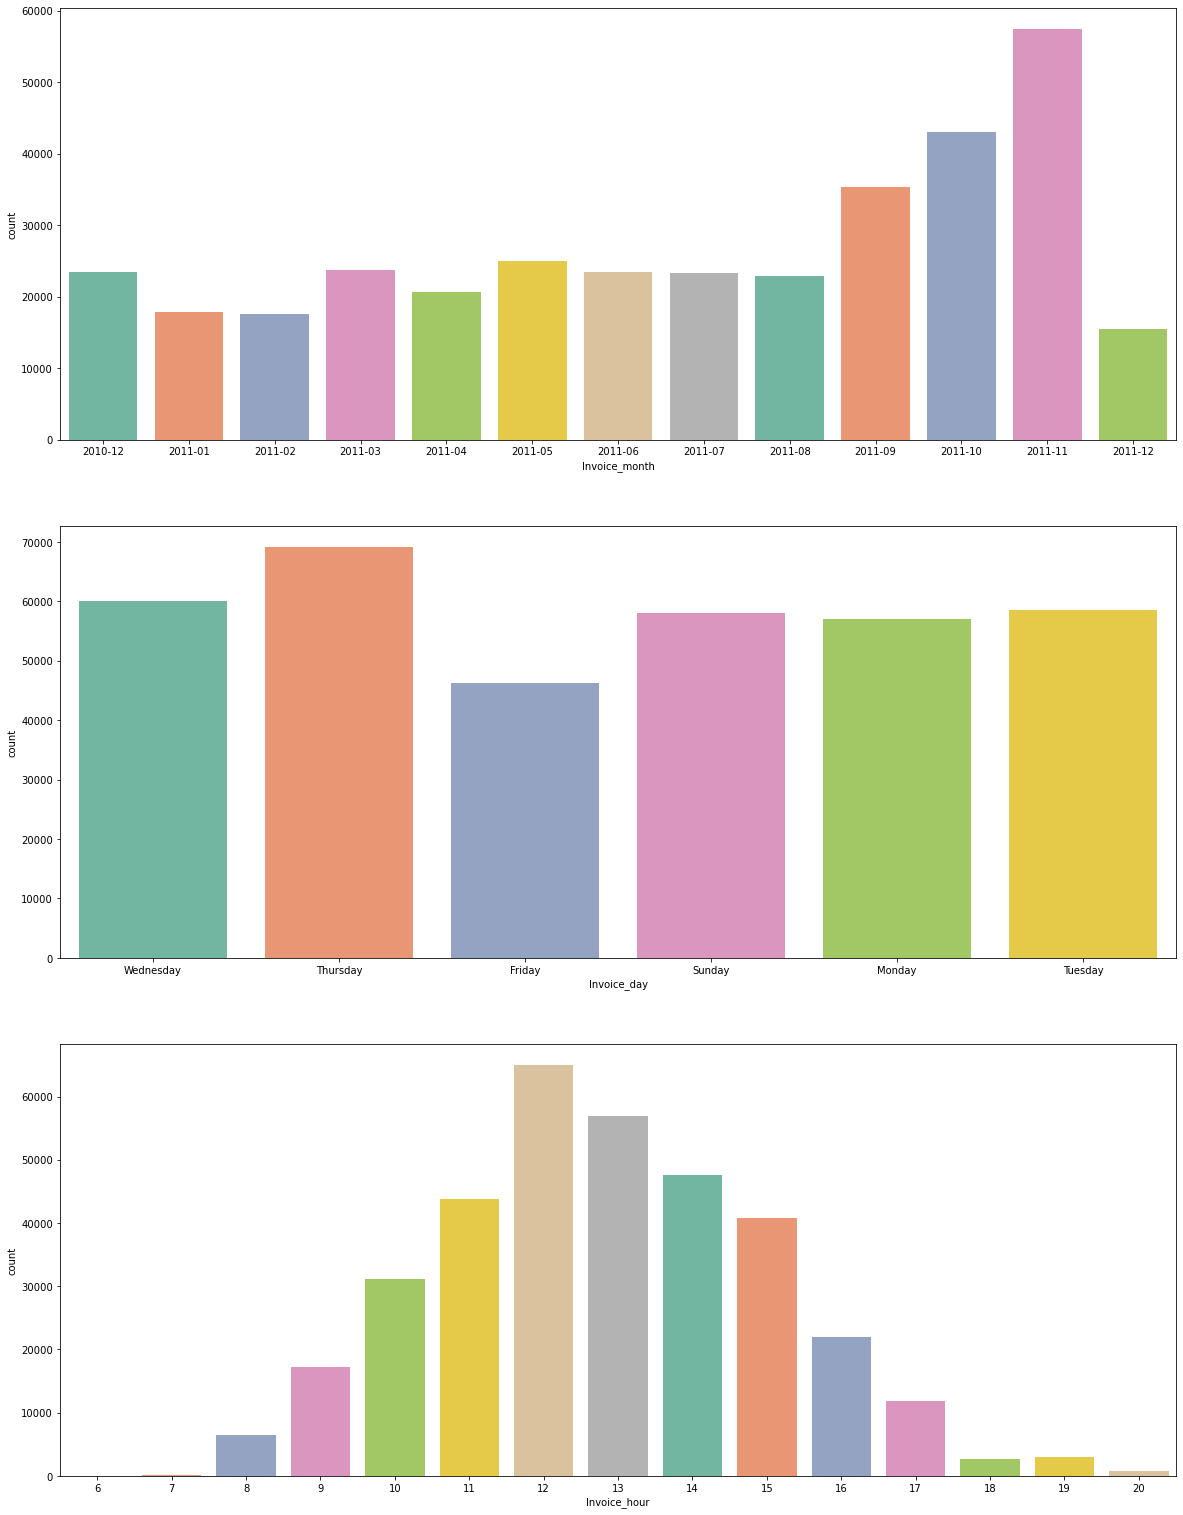

In [35]:
columns = ['Invoice_month','Invoice_day','Invoice_hour']
fig = plt.figure(figsize=(20,27))
for i in range(len(columns)):
  col=columns[i]
  sub=fig.add_subplot(3,1,i+1)
  chart = sns.countplot(data=uk_data,x=col,palette="Set2")

## Observations :

* Maximum amount of invoices were generated in the month of November in 2011 that crosses almost 6000 numbers.

* Talking about day of the week,Thursday can be regarded as the most rushed day in the whole week.

* Maximum rush was observed in the mid-day i.e. between 12 hrs to 14 hrs.

In [36]:
# Calculate total price and add to the dataframe
uk_data["Total_sales"] = uk_data["UnitPrice"]*uk_data["Quantity"]

In [37]:
# Looking at the applied changes
uk_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_day,Invoice_hour,Invoice_month,month,purchase_date,Total_sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,8,2010-12,December,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,8,2010-12,December,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,8,2010-12,December,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,8,2010-12,December,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,8,2010-12,December,2010-12-01,20.34


In [38]:
## Generating the dataframe of country w.r.t the Revenue generated
uk_total_revenue=uk_data.groupby('Country')['Total_sales'].sum().reset_index().sort_values('Total_sales',ascending=False).head(10)
uk_total_revenue

,Country,Total_sales
0,United Kingdom,7.285025e+06


<AxesSubplot:title={'center':'Monthly Growth'}, xlabel='Invoice_month'>

<Figure size 864x432 with 0 Axes>

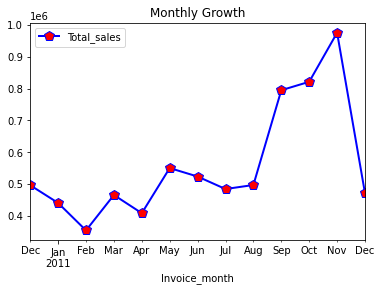

In [39]:
#Let's plot the Monthly growth
plt.figure(figsize = (12,6))
tsales_month = uk_data.groupby('Invoice_month').Total_sales.sum().reset_index()
tsales_month.plot.line(x='Invoice_month',y='Total_sales',title='Monthly Growth',color = 'b',marker='p', markersize=10, linewidth=2,markerfacecolor='red')

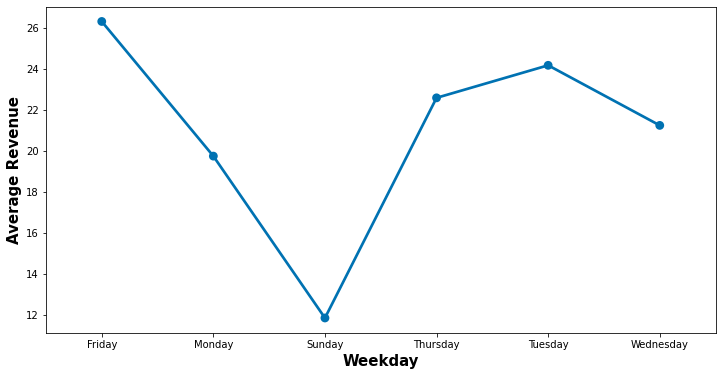

In [40]:
#Bussiest day of the week
tsales_weekday = uk_data.groupby('Invoice_day').Total_sales.mean()
plt.figure(figsize = (12,6))
sns.pointplot(x=tsales_weekday.index, y=tsales_weekday.values)
plt.ylabel('Average Revenue',weight="bold",size=15)
plt.xlabel('Weekday',weight="bold",size=15)
plt.show()

In [41]:
#searching any value on saturday
uk_data[uk_data['Invoice_day'].str.contains('Sa')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_day,Invoice_hour,Invoice_month,month,purchase_date,Total_sales


## Observation:
* Maximum average revenue was observed to be on the Thursday and Friday,On Tuesday also the revenue generated was comparitive.

* Minimum average revenue was generated on Sundays followed by no purchase on saturday.

### Top 20 Products Sold From the Store

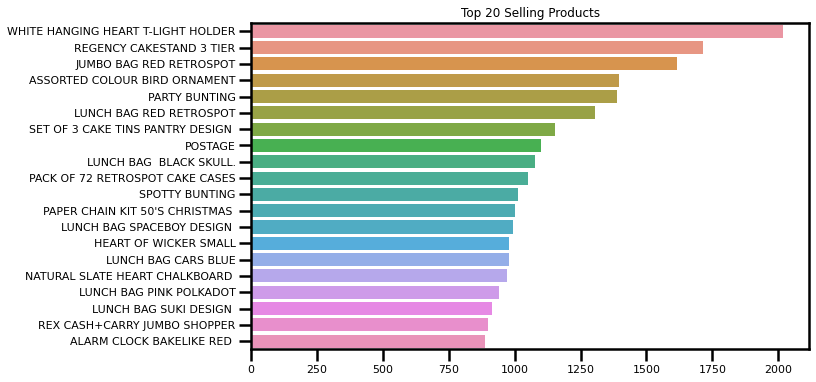

In [42]:
# Creating the required Dataframe
top_products = df_new['Description'].value_counts()[:20]
plt.figure(figsize=(10,6))

# Plotting the plot
sns.set_context("poster",font_scale=0.5)
sns.barplot(y=top_products.index,x=top_products.values)
plt.title('Top 20 Selling Products')
plt.show()


* White Hanging Heart T-light holder is the top selling item followed by Regency Cakestand 3 Tier

In [43]:
#changing the datatype of the Customer id
uk_data['CustomerID'] = uk_data['CustomerID'].astype('int64')
#changing the datatype of the purchase_date
uk_data['purchase_date']=uk_data['purchase_date'].astype('datetime64[ns]')


In [44]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349203 entries, 0 to 541893
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      349203 non-null  object        
 1   StockCode      349203 non-null  object        
 2   Description    349203 non-null  object        
 3   Quantity       349203 non-null  int64         
 4   InvoiceDate    349203 non-null  datetime64[ns]
 5   UnitPrice      349203 non-null  float64       
 6   CustomerID     349203 non-null  int64         
 7   Country        349203 non-null  object        
 8   Invoice_day    349203 non-null  object        
 9   Invoice_hour   349203 non-null  int64         
 10  Invoice_month  349203 non-null  period[M]     
 11  month          349203 non-null  object        
 12  purchase_date  349203 non-null  datetime64[ns]
 13  Total_sales    349203 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(3), object(6

In [45]:
#Removing the features that are not required for RFM
uk_data.drop(['Invoice_day','Invoice_hour','Invoice_month','month'],axis=1,inplace=True)

### RFM Analysis
Recency Frequency Monetary (RFM)

RFM analysis allows you to segment customers by the frequency and value of purchases and identify those customers who spend the most money.

* Recency — how long it’s been since a customer bought something from us.

* Frequency — how often a customer buys from us.

* Monetary value — the total value of purchases a customer has made.

The last invoice date is 2011–12–09, we will use this date to calculate Recency.

In [49]:
 uk_data['Date'] = pd.DatetimeIndex(uk_data.InvoiceDate).date

In [50]:
#Recency

df_recency = uk_data.groupby(['CustomerID'],as_index=False)['Date'].max()
df_recency.columns = ['CustomerID','Last_Purchase_Date']

df_recency['Recency'] = df_recency.Last_Purchase_Date.apply(lambda x:(NOW - x).days)
df_recency.drop(columns=['Last_Purchase_Date'],inplace=True)
df_recency.head()

,CustomerID,Recency
0,12346,325
1,12747,2
2,12748,0
3,12749,3
4,12820,3


In [52]:
#Frequency - Monetarty

FM_Table = uk_data.groupby('CustomerID').agg({'InvoiceNo'   : lambda x:len(x),
                                         'Total_sales'  : lambda x:x.sum()})
FM_Table.rename(columns = {'InvoiceNo' :'Frequency',
                           'Total_sales':'Monetary'},inplace= True)
FM_Table.head()

,Frequency,Monetary
CustomerID,,
12346,1,77183.60
12747,103,4196.01
12748,4412,33053.19
12749,199,4090.88
12820,59,942.34


In [54]:
RFM_Table = df_recency.merge(FM_Table,left_on='CustomerID',right_on='CustomerID')
RFM_Table.head()

,CustomerID,Recency,Frequency,Monetary
0,12346,325,1,77183.60
1,12747,2,103,4196.01
2,12748,0,4412,33053.19
3,12749,3,199,4090.88
4,12820,3,59,942.34


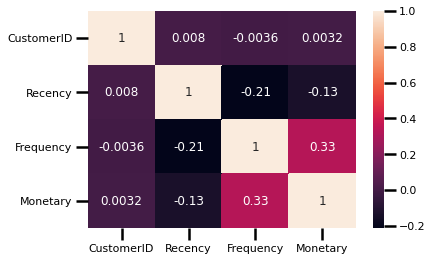

In [55]:
#Heatmap check
sns.heatmap(RFM_Table.corr(), annot=True);

## Modeling Data: RFM Quantiles
* Now that we have our values,we need to divide the customers into different quartiles for recency, frequency and monetary, and concatenating the numbers of each quartile

* We will assign a score from 1 to 4 to each Recency, Frequency and Monetary respectively.
* 1 is the highest value, and 4 is the lowest value.
* A final RFM score (Overall Value) is calculated simply by combining individual RFM score numbers.

In [56]:
quantiles = RFM_Table.quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()

In [57]:
segmented_rfm = RFM_Table.copy()

In [58]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [59]:
segmented_rfm['R_quartile'] = segmented_rfm['Recency'].apply(RScore, args=('Recency',quantiles))
segmented_rfm['F_quartile'] = segmented_rfm['Frequency'].apply(FMScore, args=('Frequency',quantiles))
segmented_rfm['M_quartile'] = segmented_rfm['Monetary'].apply(FMScore, args=('Monetary',quantiles))
segmented_rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile
0,12346,325,1,77183.60,4,4,1
1,12747,2,103,4196.01,1,1,1
2,12748,0,4412,33053.19,1,1,1
3,12749,3,199,4090.88,1,1,1
4,12820,3,59,942.34,1,2,2


* Calculating the total RFM score combined.

RFM_Score = R_quartile + F_quartile + M_quartile

In [60]:
segmented_rfm['RFM_Segment'] = segmented_rfm.R_quartile.map(str)+segmented_rfm.F_quartile.map(str)+segmented_rfm.M_quartile.map(str)

In [61]:
segmented_rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment
0,12346,325,1,77183.60,4,4,1,441
1,12747,2,103,4196.01,1,1,1,111
2,12748,0,4412,33053.19,1,1,1,111
3,12749,3,199,4090.88,1,1,1,111
4,12820,3,59,942.34,1,2,2,122


In [62]:
segmented_rfm['RFM_Score'] = segmented_rfm[['R_quartile','F_quartile','M_quartile']].sum(axis=1)

In [63]:
segmented_rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score
0,12346,325,1,77183.60,4,4,1,441,9
1,12747,2,103,4196.01,1,1,1,111,3
2,12748,0,4412,33053.19,1,1,1,111,3
3,12749,3,199,4090.88,1,1,1,111,3
4,12820,3,59,942.34,1,2,2,122,5


In [64]:
print("Best Customers: ",len(segmented_rfm[segmented_rfm['RFM_Segment']=='111']))
print('Loyal Customers: ',len(segmented_rfm[segmented_rfm['F_quartile']==1]))
print("Big Spenders: ",len(segmented_rfm[segmented_rfm['M_quartile']==1]))
print('Almost Lost: ', len(segmented_rfm[segmented_rfm['RFM_Segment']=='134']))
print('Lost Customers: ',len(segmented_rfm[segmented_rfm['RFM_Segment']=='344']))
print('Lost Cheap Customers: ',len(segmented_rfm[segmented_rfm['RFM_Segment']=='444']))

Best Customers:  407
Loyal Customers:  969
Big Spenders:  980
Almost Lost:  22
Lost Customers:  166
Lost Cheap Customers:  343


In [65]:
# Setting up the label for each client and adding the column "Label" to the dataframe

label = [0] * len(segmented_rfm)

for i in range(0,len(segmented_rfm)):

    if segmented_rfm['RFM_Segment'][i] == '111':
        label[i] = "Best Customers"
        
    elif segmented_rfm['RFM_Segment'][i] == '134' :
        label[i] = "Almost Lost"
        
    elif segmented_rfm['RFM_Segment'][i] == '344':
        label[i] = "Lost Customers"
    
    elif segmented_rfm['RFM_Segment'][i] == '444':
        label[i] = "Lost Cheap Customers"

    elif segmented_rfm['F_quartile'][i] == 1:
        label[i] = "Loyal Customers"  
    
    elif segmented_rfm['M_quartile'][i] == 1:
        label[i] = "Big Spenders"   
        
    else:
        label[i] = "Others"

In [66]:
# Adding the 'Label' column to our dataframe

segmented_rfm['Label'] = label

In [67]:
# Count the frequency that a value occurs in a dataframe column for the labels.

segmented_rfm['Label'].value_counts()

Others                  2145
Loyal Customers          562
Best Customers           407
Lost Cheap Customers     343
Big Spenders             275
Lost Customers           166
Almost Lost               22
Name: Label, dtype: int64

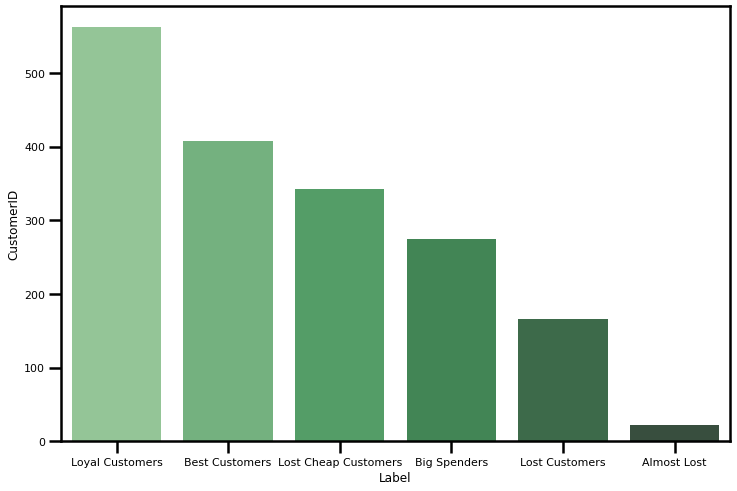

In [68]:
sq1=segmented_rfm.groupby('Label')['CustomerID'].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12,8))
sq1.drop([0],inplace=True)
sns.barplot(data=sq1, x="Label", y="CustomerID", palette = "Greens_d");

#  K-Means Clustering
* K-Means clustering algorithm is an unsupervised machine learning algorithm that uses multiple iterations to segment the unlabeled data points into K different clusters in a way such that each data point belongs to only a single group that has similar properties.

In [69]:
RFM_Table_New = RFM_Table.drop('CustomerID', axis=1)

In [70]:
RFM_Table_New.head()

,Recency,Frequency,Monetary
0,325,1,77183.60
1,2,103,4196.01
2,0,4412,33053.19
3,3,199,4090.88
4,3,59,942.34


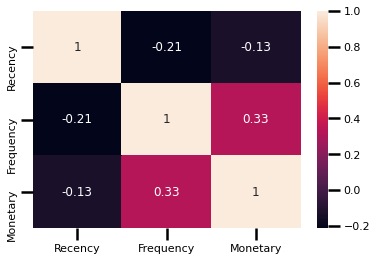

In [71]:
#Heatmap check
sns.heatmap(RFM_Table_New.corr(), annot=True);

<AxesSubplot:xlabel='Recency', ylabel='Density'>

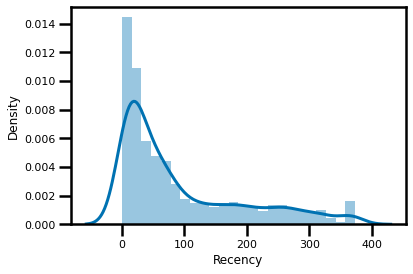

In [72]:
#Analyze distribution

sns.distplot(RFM_Table_New['Recency'])

<AxesSubplot:xlabel='Frequency', ylabel='Density'>

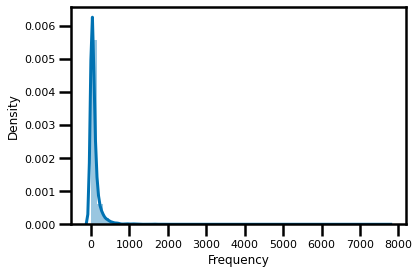

In [73]:
sns.distplot(RFM_Table_New['Frequency'])

<AxesSubplot:xlabel='Monetary', ylabel='Density'>

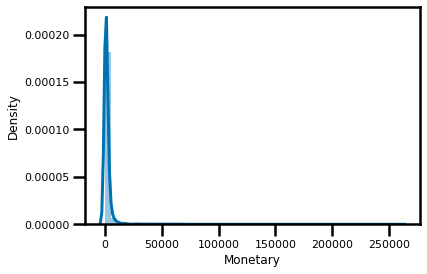

In [74]:
sns.distplot(RFM_Table_New['Monetary'])

### K-means gives the best result under the following conditions:
* Data’s distribution is not skewed.
* Data is standardised.



The data is highly skewed,therefore we will perform log transformations to reduce the skewness of each variable. I added a small constant as log transformation demands all the values to be positive.

In [75]:
df_rfm_log = RFM_Table_New.copy()
df_rfm_log.head()

,Recency,Frequency,Monetary
0,325,1,77183.60
1,2,103,4196.01
2,0,4412,33053.19
3,3,199,4090.88
4,3,59,942.34


In [76]:
df_rfm_log = np.log(df_rfm_log+1)

In [78]:
#Developing preprocessing with StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(df_rfm_log)

RFM_Table_New_scaled = scaler.transform(df_rfm_log)

In [79]:
RFM_Table_New_scaled = pd.DataFrame(RFM_Table_New_scaled, columns=RFM_Table_New.columns)
RFM_Table_New_scaled.head()

,Recency,Frequency,Monetary
0,1.438428,-2.407557,3.788077
1,-1.953555,0.743030,1.447841
2,-2.748403,3.731493,3.106498
3,-1.745416,1.264449,1.427453
4,-1.745416,0.304442,0.248157


<AxesSubplot:xlabel='Recency', ylabel='Density'>

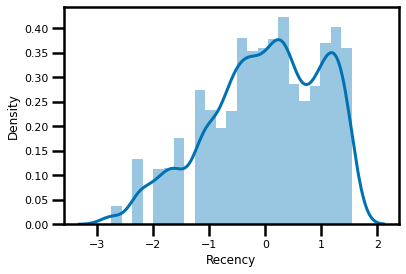

In [80]:
#Analyze distribution

sns.distplot(RFM_Table_New_scaled['Recency'])

<AxesSubplot:xlabel='Frequency', ylabel='Density'>

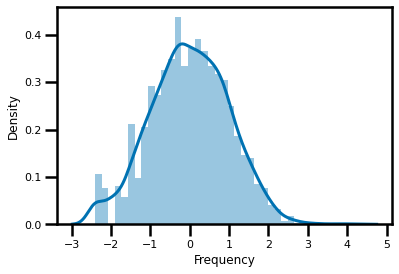

In [81]:
sns.distplot(RFM_Table_New_scaled['Frequency'])

<AxesSubplot:xlabel='Monetary', ylabel='Density'>

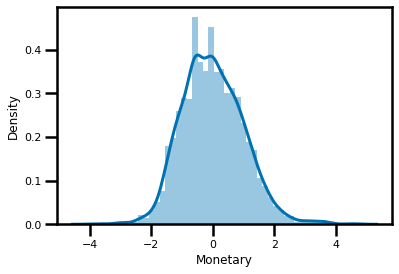

In [82]:
sns.distplot(RFM_Table_New_scaled['Monetary'])

## Finding the optimal number of clusters

In [83]:
X = np.asarray(RFM_Table_New_scaled)

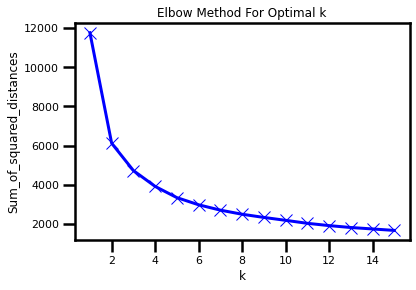

In [85]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,16)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [89]:
from sklearn.metrics import davies_bouldin_score
from sklearn.manifold import TSNE
import plotly.offline as pyoff
import plotly.graph_objs as go

def kmeans(normalised_df_rfm, clusters_number, original_df_rfm):
    
    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(normalised_df_rfm)

    # Extract cluster labels
    cluster_labels = kmeans.labels_
        
    # Create a cluster label column in original dataset
    df_new = original_df_rfm.assign(Cluster = cluster_labels)
    
    # Initialise TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)
    
    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")
    
    return df_new

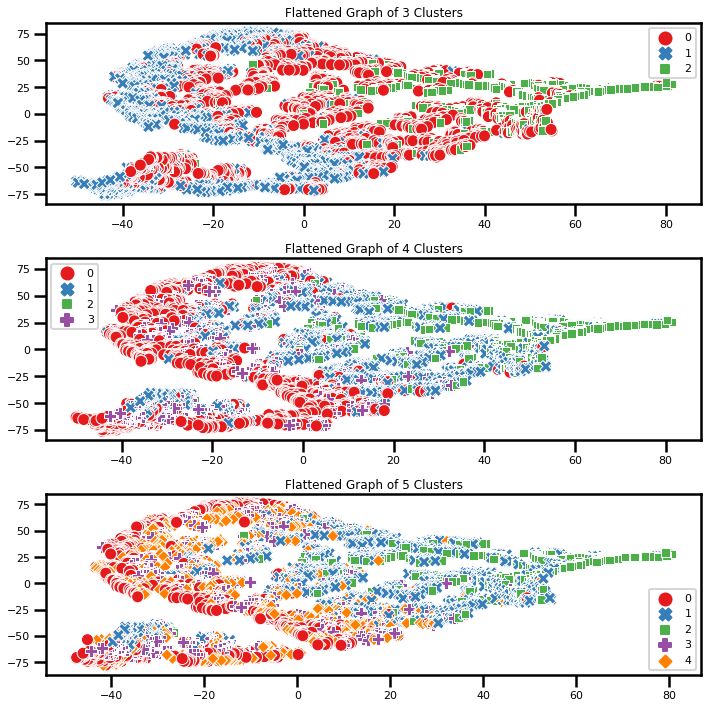

In [90]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
df_rfm_k3 = kmeans(RFM_Table_New_scaled, 3, RFM_Table)

plt.subplot(3, 1, 2)
df_rfm_k4 = kmeans(RFM_Table_New_scaled, 4, RFM_Table)

plt.subplot(3, 1, 3)
df_rfm_k5 = kmeans(RFM_Table_New_scaled, 5, RFM_Table)

plt.tight_layout()

## Evaluating Model: K-Means Clustering

* Davies Bouldin Score is a metric for evaluating clustering algorithms. The smaller Davies Bouldin Score is The more optimal the cluster.

K-Means = 3

In [91]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [92]:
print(davies_bouldin_score(X, kmeans.labels_))

1.0977182647711476


K-Means = 4

In [93]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(n_clusters=4)

In [94]:
print(davies_bouldin_score(X, kmeans.labels_))

1.062559055104735


K-Means = 5

In [95]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(n_clusters=5)

In [96]:
print(davies_bouldin_score(X, kmeans.labels_))

1.0863513808127407


* K-Means 4 clusters has lowest davies bouldin score than other cluster. Therefore the optimum cluster is 4.

In [97]:
df_rfm_k4.head()

,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346,325,1,77183.60,1
1,12747,2,103,4196.01,2
2,12748,0,4412,33053.19,2
3,12749,3,199,4090.88,2
4,12820,3,59,942.34,3


In [98]:
df_rfm_k4.Cluster.value_counts()

0    1253
1    1146
3     770
2     751
Name: Cluster, dtype: int64

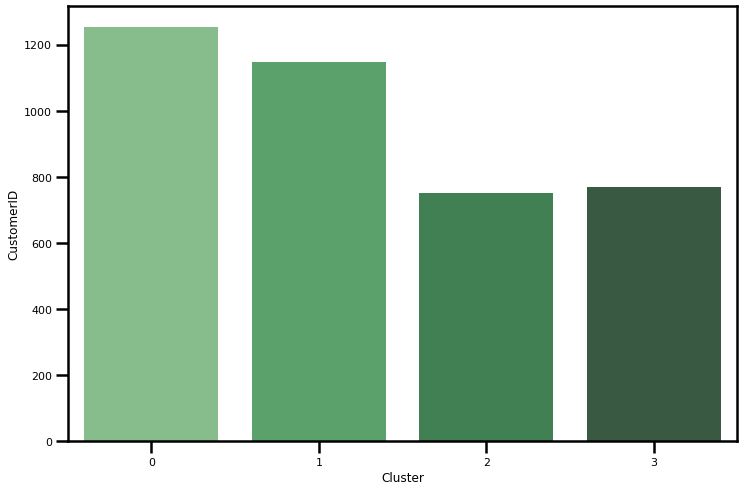

In [99]:
sq1=df_rfm_k4.groupby('Cluster')['CustomerID'].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12,8))
sns.barplot(data=sq1, x="Cluster", y="CustomerID", palette = "Greens_d");

In [100]:
def rfm_values(df):

    df_new = df.groupby(['Cluster']).agg({
        'Recency': 'mean',
        'Frequency': 'mean',
        'Monetary': ['mean', 'count']
    }).round(0)
    
    return df_new

In [101]:
rfm_values(df_rfm_k4)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0         187.0      15.0    291.0  1253
1          88.0      83.0   1494.0  1146
2          11.0     277.0   6373.0   751
3          21.0      35.0    547.0   770

"Cluster 0" has 32% customers. These customers Have purchased in recent time, but do not purchase frequently and do not spent a lot.

"Cluster 1" has 30% customers. It can be interpreted as they do not purchase recently.Also they do not purchase frequently and do spent a lot.

"Cluster 2" has 18% customers. It can be interpreted as their last purchase is long ago, purchased frequency is best and spent the most.

"Cluster 3" has 20% customers. It belongs to those segment which we saw earlier as they purchase too long ago, buying frequency is poor, and spent second least amongs category.